Accuracy: 0.41040462427745666
Confusion Matrix:
[[ 12  23  23  25]
 [  2   5   2   2]
 [ 52  52 110  21]
 [  1   0   1  15]]


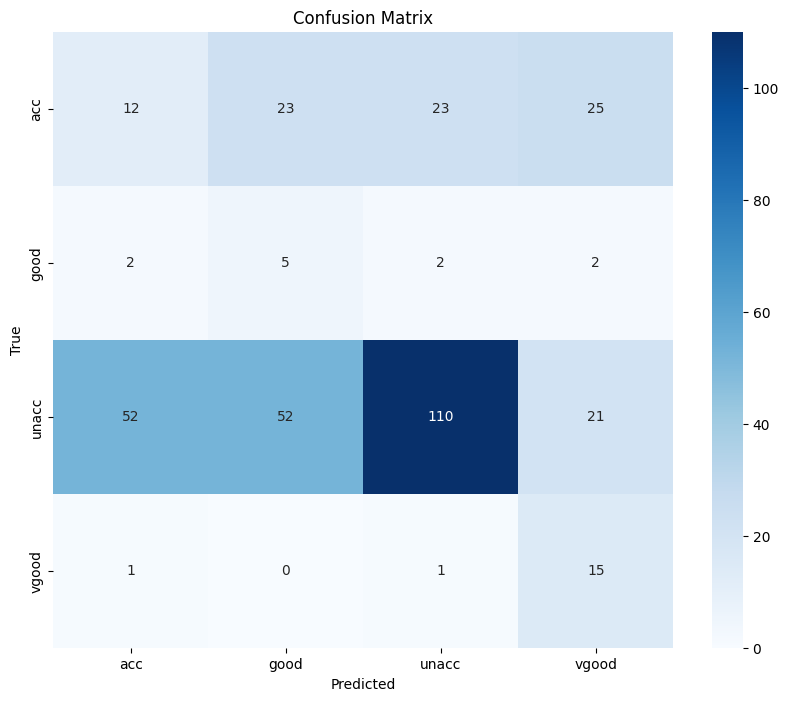

In [10]:
# Install required libraries
!pip install pandas scikit-learn seaborn

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Car Evaluation dataset (replace 'url' with the actual URL of your dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "target"]
data = pd.read_csv(url, names=column_names)

# Encode categorical features
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)

# Convert to NumPy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# LVQ3 Implementation
# ...

# ...

class LVQ3:
    def __init__(self, prototype_count=5, learning_rate=0.1):
        self.prototype_count = prototype_count
        self.learning_rate = learning_rate
        self.prototypes = None
        self.classes = None

    def initialize_prototypes(self, X, y):
        self.classes = np.unique(y)
        self.prototypes = {}
        for class_label in self.classes:
            class_samples = X[y == class_label]
            prototypes_indices = np.random.choice(len(class_samples), self.prototype_count, replace=False)
            self.prototypes[class_label] = class_samples[prototypes_indices].astype(np.float64)  # Ensure prototypes are float64

    def find_closest_prototype(self, x):
        distances = [np.linalg.norm(x - self.prototypes[class_label]) for class_label in self.classes]
        closest_class = self.classes[np.argmin(distances)]
        return closest_class

    def update_prototype(self, x, target_class):
        self.prototypes[target_class] += self.learning_rate * (x - self.prototypes[target_class])

    def fit(self, X, y, epochs=100):
        self.initialize_prototypes(X, y)
        for epoch in range(epochs):
            for i in range(len(X)):
                x = X[i]
                true_class = y[i]
                predicted_class = self.find_closest_prototype(x)
                if predicted_class == true_class:
                    self.update_prototype(x, true_class)
                else:
                    self.update_prototype(x, true_class)

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            x = X[i]
            predicted_class = self.find_closest_prototype(x)
            predictions.append(predicted_class)
        return np.array(predictions)

# ...


# ...


# Train the model
lvq3_model = LVQ3()
lvq3_model.fit(X_train_np, y_train_np)

# Evaluate on the test set
y_pred = lvq3_model.predict(X_test_np)
accuracy = accuracy_score(y_test_np, y_pred)
conf_matrix = confusion_matrix(y_test_np, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize prototype vectors
# ...

# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
